In [3]:
import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
expfolder = paths.sample_derivatives / "DictLr_Ncomps-4_PosCode-False_Alpha-1.0_Tvalue-15_Act-pos_n-34"
components = np.load(expfolder / paths.dictcomps_npy_name)
assignments = pd.read_pickle(expfolder / paths.comp_assignments_df_name).reset_index(level="frame_time")
display(components.shape)
assignments

(4, 23662)

block                     frame_time RetainedFrames   DictComp             \
                                               type          0          1   
subj_name       ses_name                                                    
sub-CC00060XX03 ses-12501          7           high -10.879086   2.653526   
                ses-12501          9           high -11.784518   9.907831   
                ses-12501         11           high -11.375840   7.363851   
                ses-12501         14           high -11.847229   9.825774   
                ses-12501         38           high   0.000000  -4.417972   
...                              ...            ...        ...        ...   
sub-CC00197XX17 ses-66500       2258           high   1.047614   9.754783   
                ses-66500       2259           high   4.622557   8.847193   
                ses-66500       2260           high   0.000000  10.973441   
                ses-66500       2263           high   3.571809  10.009329   
                ses-66500       2265           high   6.439673   4.647696   

block                                          
                                  2         3  
subj_name       ses_name                       
sub-CC00060XX03 ses-12501  6.642318 -2.644483  
                ses-12501  4.928092  0.000000  
                ses-12501  0.625866  0.000000  
                ses-12501  4.752251  0.000000  
                ses-12501  0.872352 -5.149832  
...                             ...       ...  
sub-CC00197XX17 ses-66500  0.000000 -2.767422  
                ses-66500  1.841949  0.000000  
                ses-66500  0.000000 -0.164025  
                ses-66500  2.023700  0.000000  
                ses-66500  1.673406  1.215313  

[11662 rows x 6 columns]

In [18]:
subjs_infos = paths.bids_root / "combined.tsv"
subjs_infos = pd.read_csv(subjs_infos, sep="\t")
subjs_infos['subj_name'] = subjs_infos['participant_id'].apply(lambda x: f"sub-{x}")
subjs_infos['ses_name'] = subjs_infos['session_id'].apply(lambda x: f"ses-{x}")
subjs_infos = subjs_infos.set_index(["subj_name", "ses_name"]).drop(columns=['participant_id', 'session_id'])
subjs_infos.columns = pd.MultiIndex.from_product([['metadata'], subjs_infos.columns])


assignments_metadata_df = assignments.join(subjs_infos, how='left')
assignments_metadata_df

frame_time RetainedFrames   DictComp             \
                                               type          0          1   
subj_name       ses_name                                                    
sub-CC00060XX03 ses-12501          7           high -10.879086   2.653526   
                ses-12501          9           high -11.784518   9.907831   
                ses-12501         11           high -11.375840   7.363851   
                ses-12501         14           high -11.847229   9.825774   
                ses-12501         38           high   0.000000  -4.417972   
...                              ...            ...        ...        ...   
sub-CC00197XX17 ses-66500       2258           high   1.047614   9.754783   
                ses-66500       2259           high   4.622557   8.847193   
                ses-66500       2260           high   0.000000  10.973441   
                ses-66500       2263           high   3.571809  10.009329   
                ses-66500       2265           high   6.439673   4.647696   

                                                 metadata                     \
                                  2         3 scan_number singleton sedation   
subj_name       ses_name                                                       
sub-CC00060XX03 ses-12501  6.642318 -2.644483           1         S    False   
                ses-12501  4.928092  0.000000           1         S    False   
                ses-12501  0.625866  0.000000           1         S    False   
                ses-12501  4.752251  0.000000           1         S    False   
                ses-12501  0.872352 -5.149832           1         S    False   
...                             ...       ...         ...       ...      ...   
sub-CC00197XX17 ses-66500  0.000000 -2.767422           1         S    False   
                ses-66500  1.841949  0.000000           1         S    False   
                ses-66500  0.000000 -0.164025           1         S    False   
                ses-66500  2.023700  0.000000           1         S    False   
                ses-66500  1.673406  1.215313           1         S    False   

                                      ...                        \
                           birth_age  ... qc_fmri_fieldmap_type   
subj_name       ses_name              ...                         
sub-CC00060XX03 ses-12501  40.142857  ...         spin_echo_epi   
                ses-12501  40.142857  ...         spin_echo_epi   
                ses-12501  40.142857  ...         spin_echo_epi   
                ses-12501  40.142857  ...         spin_echo_epi   
                ses-12501  40.142857  ...         spin_echo_epi   
...                              ...  ...                   ...   
sub-CC00197XX17 ses-66500  39.428571  ...         spin_echo_epi   
                ses-66500  39.428571  ...         spin_echo_epi   
                ses-66500  39.428571  ...         spin_echo_epi   
                ses-66500  39.428571  ...         spin_echo_epi   
                ses-66500  39.428571  ...         spin_echo_epi   

                                                                               \
                          qc_fmri_dvars_z qc_fmri_tsnr_z qc_fmri_mcdc2sbref_z   
subj_name       ses_name                                                        
sub-CC00060XX03 ses-12501        1.045225       0.484567             0.617894   
                ses-12501        1.045225       0.484567             0.617894   
                ses-12501        1.045225       0.484567             0.617894   
                ses-12501        1.045225       0.484567             0.617894   
                ses-12501        1.045225       0.484567             0.617894   
...                                   ...            ...                  ...   
sub-CC00197XX17 ses-66500       -1.031097      -1.539802            -0.201042   
                ses-66500       -1.031097      -1.539802            -0.201042

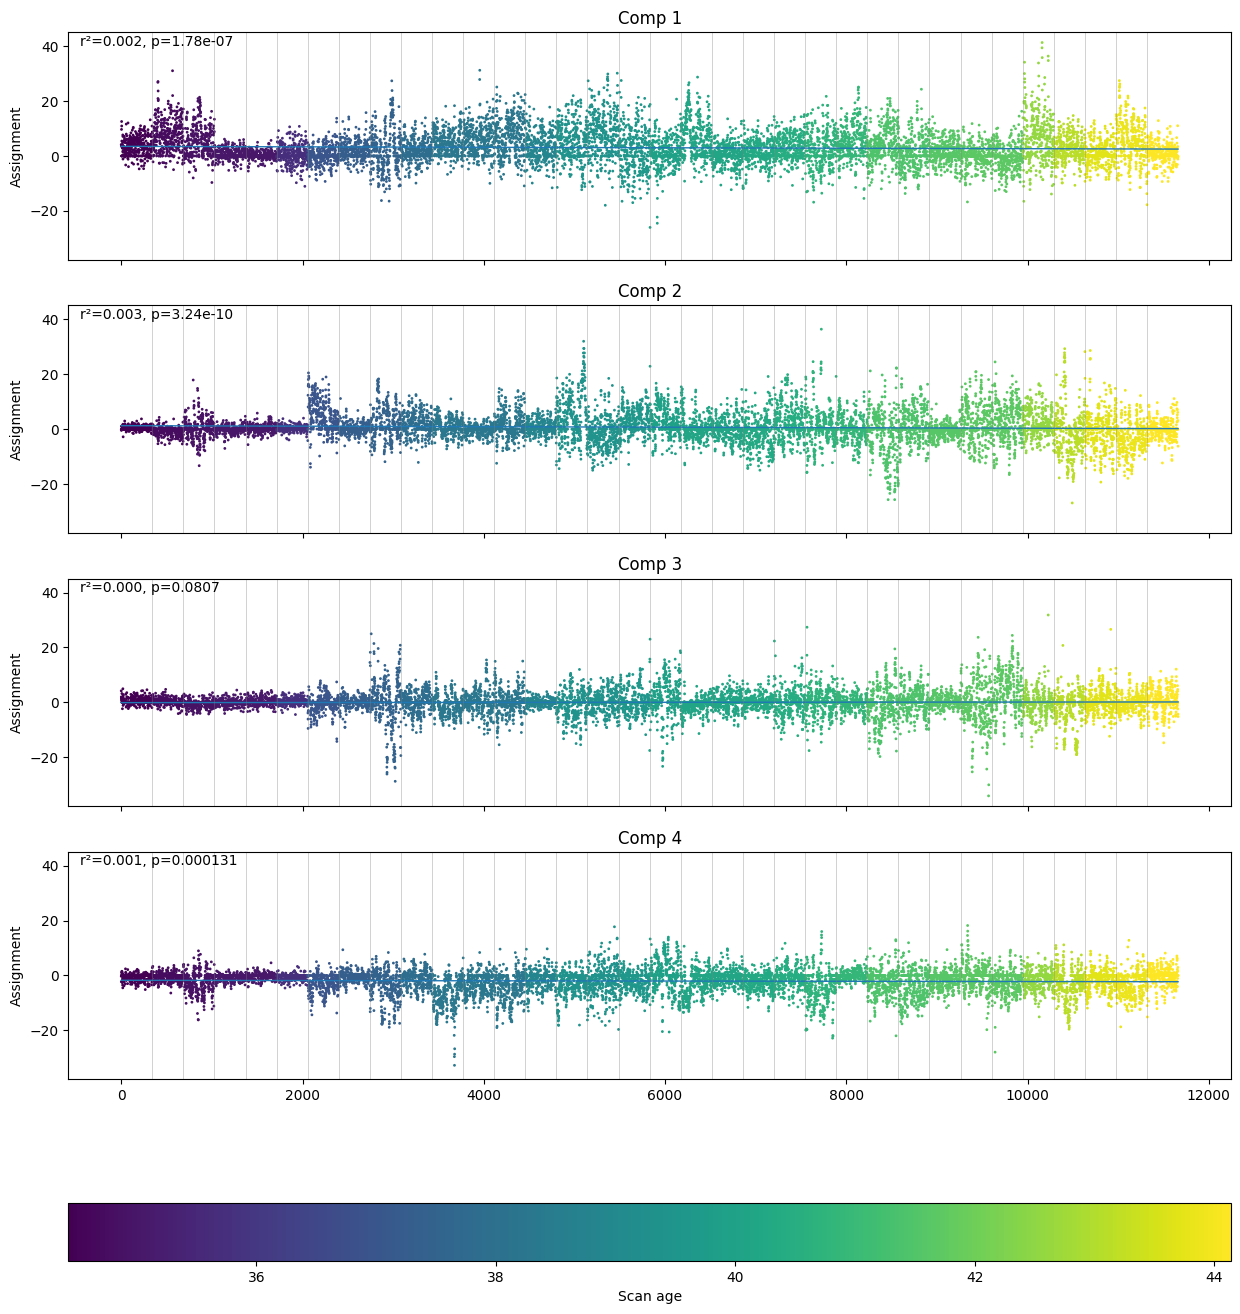

In [125]:
from scipy.stats import linregress

n_comps = components.shape[0]

fig, axes = plt.subplots(n_comps, 1, figsize=(15, 4 * n_comps), sharex=True, sharey=True)

age_sorted_assignments = assignments_metadata_df.sort_values(('metadata', 'scan_age'))

age_sorted_assignments = assignments_metadata_df.sort_values(by=[
    ('metadata', 'scan_age'),
    'subj_name'
])


codes = age_sorted_assignments["metadata", "scan_age"].values
subjects = age_sorted_assignments.index.get_level_values("subj_name")
change_points = np.where(subjects[:-1] != subjects[1:])[0] + 0.5



x = np.arange(len(codes))

for ax, comp in zip(axes, age_sorted_assignments["DictComp"].columns):
    y = age_sorted_assignments["DictComp"][comp].values

    sc = ax.scatter(x, y, c=codes, s=1)
    ax.set_ylabel("Assignment")
    ax.set_title(f"Comp {comp+1}")

    slope, intercept, r, p, stderr = linregress(x, y)
    r2 = r ** 2
    ax.plot(x, slope*x + intercept, linewidth=1)


    ax.text(0.01, 0.99,
            f"r²={r2:.3f}, p={p:.3g}",
            transform=ax.transAxes,
            va="top", ha="left")


    for cp in change_points:
        ax.axvline(cp, color="gray", linewidth=0.5, alpha=0.5)


cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), orientation="horizontal", fraction=0.05, pad=0.1)
cbar.set_label("Scan age")
plt.show()


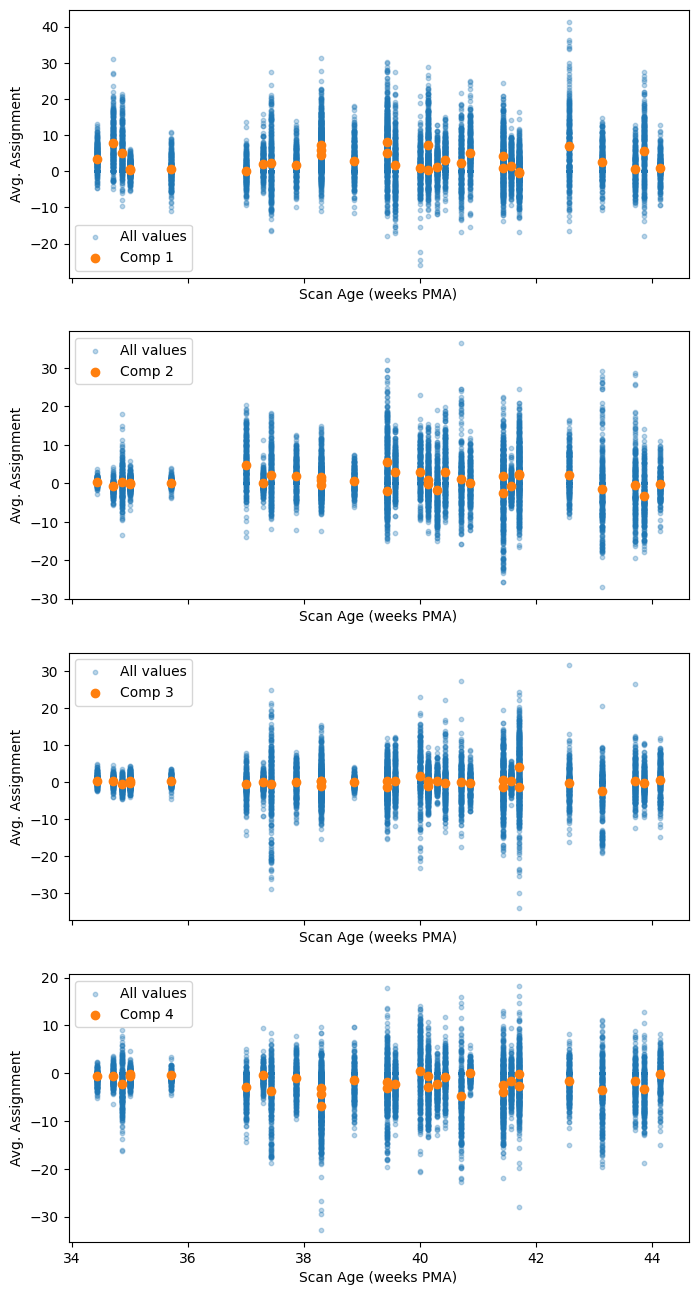

In [82]:
# plot assignments over age

scan_ages = age_sorted_assignments["metadata", 'scan_age']
perSubj_scan_ages = scan_ages.groupby(level=['subj_name', 'ses_name'], sort=False).first()

ageSorted_subjAveraged_compsAssignments = age_sorted_assignments["DictComp"].groupby(
    level=['subj_name', 'ses_name'],
    sort=False
).mean()

n_comps = components.shape[0]
fig, axes = plt.subplots(n_comps, 1, figsize=(8, 4 * n_comps), sharex=True, sharey=False)


for ax, com_series in zip(axes, ageSorted_subjAveraged_compsAssignments.columns):


    ax.scatter(
        scan_ages.values,
        age_sorted_assignments["DictComp"][com_series].values,
        alpha=0.3,
        s=10,
        label="All values"
    )

    ax.scatter(
        perSubj_scan_ages.values,
        ageSorted_subjAveraged_compsAssignments[com_series].values,
        label=f"Comp {com_series+1}"
    )

    ax.set_ylabel("Avg. Assignment")
    ax.set_xlabel("Scan Age (weeks PMA)")
    ax.legend()
plt.show()
